In [47]:
import pandas as pd
import plotly.express as px  # For Plotly Express, which is easy-to-use for quick visualizations
import plotly.graph_objects as go 

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

HOUSING RENTAL INCOME FORMATTING
---

In [51]:
housing = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=0)
housing.index = ['Housing'] * len(housing)
housing

,Unnamed: 0,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76


In [53]:
rental = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=1)
rental.index = ['Rental'] * len(rental)
rental

,Unnamed: 0,2019,2020,2021,2022,2023
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10


In [55]:
income = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=2)
income.index = ['Income'] * len(income)
income

,Unnamed: 0,2019,2020,2021,2022,2023
Income,DE,26105,29896,29106,28569,30308
Income,FR,26210,25382,26075,26419,27577
Income,PT,11786,12696,13113,13148,14368


In [57]:
final_df = pd.concat([housing, rental, income], ignore_index=True)
index_labels = ['Housing'] * len(housing) + ['Rental'] * len(rental) + ['Income'] * len(income)
final_df.index = index_labels

In [59]:
final_df.rename(columns={"Unnamed: 0": "Country"}, inplace=True)
final_df

,Country,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10
Income,DE,26105.00,29896.00,29106.00,28569.00,30308.00
Income,FR,26210.00,25382.00,26075.00,26419.00,27577.00
Income,PT,11786.00,12696.00,13113.00,13148.00,14368.00


In [61]:
income_df = final_df[final_df.index == 'Income']
housing_df = final_df[final_df.index == "Housing"]
rental_df = final_df[final_df.index == "Rental"]

In [63]:
income_tidy = income_df.melt(id_vars="Country", var_name="Year", value_name="Income")
housing_tidy = housing_df.melt(id_vars="Country", var_name="Year", value_name="Housing")
rental_tidy = rental_df.melt(id_vars="Country", var_name="Year", value_name="Rental")


HOUSING RENTAL INCOME GRAPHS
---

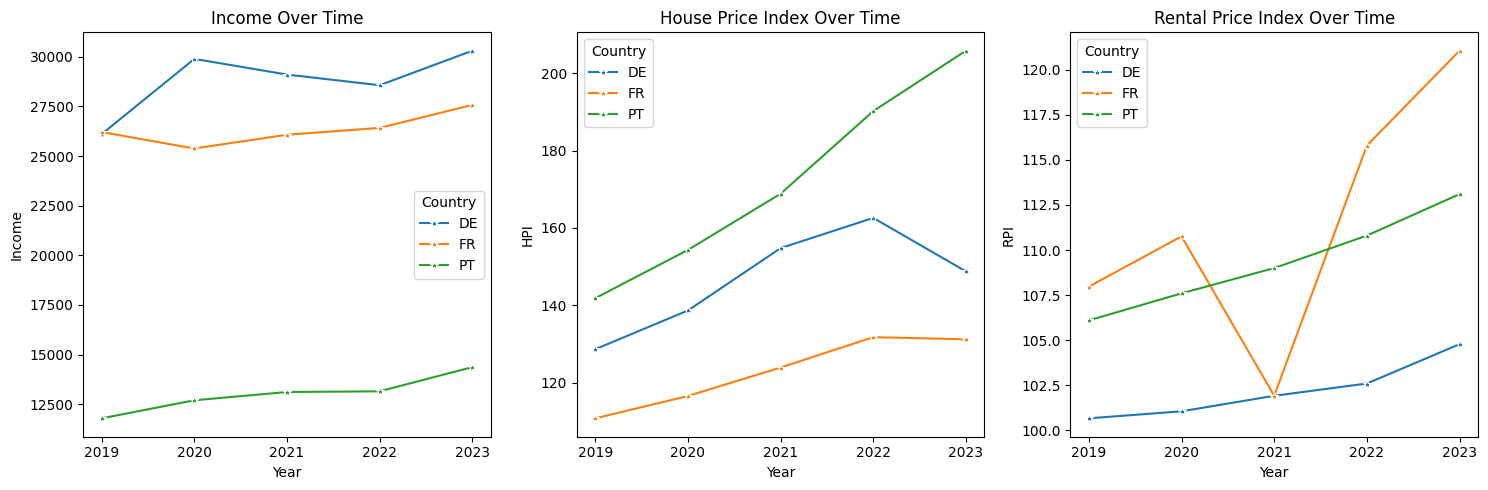

In [65]:
# Assuming income_tidy, housing_tidy, and rental_tidy are your original DataFrames

# Add a new column to each DataFrame to indicate the type of data
income_tidy['Type'] = 'Income'
housing_tidy['Type'] = 'Housing'
rental_tidy['Type'] = 'Rental'

# Concatenate the DataFrames into one long DataFrame
combined_data = pd.concat([income_tidy, housing_tidy, rental_tidy], axis=0)

# Create a figure and three subplots (axes), one for each graph
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the Income graph
sns.lineplot(data=income_tidy, x="Year", y="Income", hue="Country", marker="*", ax=axes[0])
axes[0].set_title('Income Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Income')
axes[0].legend(title='Country')

# Plot the Housing graph
sns.lineplot(data=housing_tidy, x="Year", y="Housing", hue="Country", marker="*", ax=axes[1])
axes[1].set_title('House Price Index Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('HPI')
axes[1].legend(title='Country')

# Plot the Rental graph
sns.lineplot(data=rental_tidy, x="Year", y="Rental", hue="Country", marker="*", ax=axes[2])
axes[2].set_title('Rental Price Index Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('RPI')
axes[2].legend(title='Country')

# Adjust the x-axis to only show whole years (no 0.5 steps)
for ax in axes:
    # Set x-axis ticks to only whole numbers (years)
    ax.set_xticks(range(int(min(combined_data['Year'])), int(max(combined_data['Year'])) + 1))

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

GERMANY, BERLIN
---

In [67]:
df_Cities = pd.read_excel("../data/raw/numbeo_stats.xlsx")
df_Cities.rename(columns = {"Unnamed: 0" : "Category"}, inplace = True)
# Fill missing 'Category' values using forward fill
df_Cities['Category'] = df_Cities['Category'].fillna(method='ffill')

df_berlin = df_Cities[df_Cities['City'] == 'Berlin']


# Display the updated DataFrame
df_berlin


C:\Users\manht\AppData\Local\Temp\ipykernel_4208\234529398.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Cities['Category'] = df_Cities['Category'].fillna(method='ffill')


,Category,City,2019,2020,2021,2022,2023,2024
1,1 bed apartment (rent),Berlin,905.53,889.28,1036.35,1237.16,1276.16,1186.62
4,3 bed apartment (rent),Berlin,1717.16,1715.00,2038.62,2265.78,1879.18,2253.27
7,Buy apartment ( per m2 in city center),Berlin,6193.00,5989.03,6872.62,8426.66,8147.85,7880.79
10,Av salary (after tax),Berlin,2360.33,2397.59,2971.54,2987.30,3128.02,2952.47


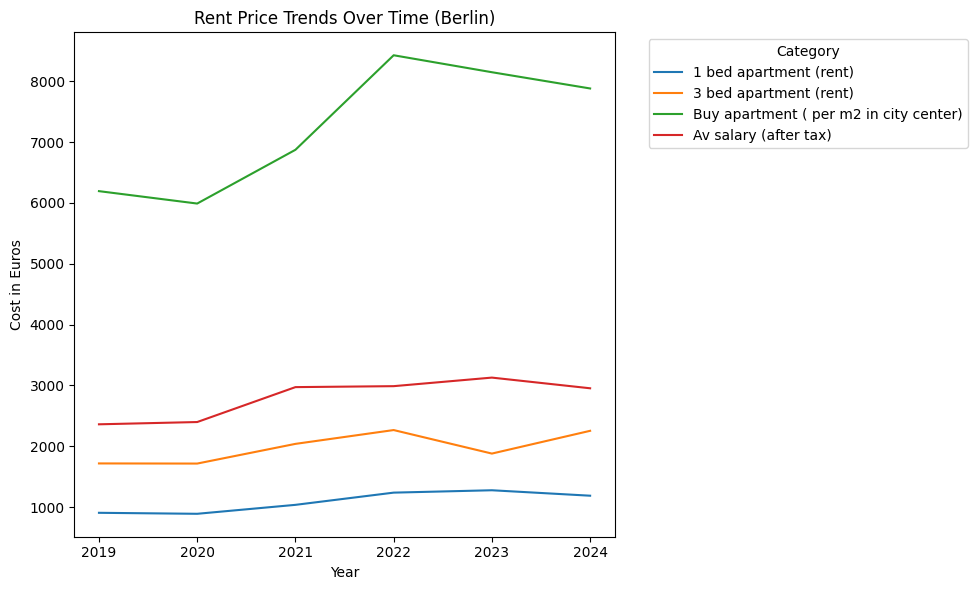

'\nmortgage cost instead of price per sqm\n\n'

In [38]:
# Filter the DataFrame for Berlin
df_berlin_long = df_berlin.melt(id_vars=['Category', 'City'], var_name='Year', value_name='Cost in Euros')

# Convert 'Year' to numeric
df_berlin_long['Year'] = pd.to_numeric(df_berlin_long['Year'], errors='coerce')

# Line plot to show trends over time for each Category in Berlin
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_berlin_long, x="Year", y="Cost in Euros", hue="Category", markers=True)
plt.title('Rent Price Trends Over Time (Berlin)')
plt.xlabel('Year')
plt.ylabel('Cost in Euros')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


"""
mortgage cost instead of price per sqm

"""

In [101]:

# Filter the DataFrame for Berlin
df_berlin_long = df_berlin.melt(id_vars=['Category', 'City'], var_name='Year', value_name='Cost in Euros')

# Convert 'Year' to numeric
df_berlin_long['Year'] = pd.to_numeric(df_berlin_long['Year'], errors='coerce')
# Assuming df_berlin_long has already been created from df_berlin
# First, extract the minimum wage data from df_countries and melt it to long format
df_min_wage = df_countries[df_countries['Category'] == 'Min wage (after tax)'].melt(
    id_vars=['Category', 'Country'], 
    var_name='Year', 
    value_name='Cost in Euros'
)

# Filter for 'DE' (Germany)
df_min_wage_de = df_min_wage[df_min_wage['Country'] == 'DE']

# Convert 'Year' to numeric (same as df_berlin_long)
df_min_wage_de['Year'] = pd.to_numeric(df_min_wage_de['Year'], errors='coerce')

# Add 'City' as a column to match with df_berlin_long (assuming Berlin is the city)
df_min_wage_de['City'] = 'Berlin'

# Concatenate df_berlin_long with df_min_wage_de
df_combined = pd.concat([df_berlin_long, df_min_wage_de[['Category', 'City', 'Year', 'Cost in Euros']]])

# Line plot to show trends over time for each Category in Berlin
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_combined, x="Year", y="Cost in Euros", hue="Category", markers=True)
plt.title('Cost Trends Over Time in Berlin')
plt.xlabel('Year')
plt.ylabel('Cost in Euros')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


NameError: name 'df_countries' is not defined

GERMANY
---

In [105]:
df_Countries = pd.read_excel("../data/raw/numbeo_stats.xlsx", sheet_name = 1)
df_Countries.rename(columns = {"Unnamed: 0" : "Category"}, inplace = True)
# Fill missing 'Category' values using forward fill
df_Countries['Category'] = df_Countries['Category'].fillna(method='ffill')
df_Countries.columns = df_Countries.columns.str.strip()

df_Germany = df_Countries[df_Countries["Country"] == 'DE']


# Display the updated DataFrame
df_Germany


C:\Users\manht\AppData\Local\Temp\ipykernel_4208\3020427231.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Countries['Category'] = df_Countries['Category'].fillna(method='ffill')


,Category,Country,2019,2020,2021,2022,2023,2024
1,1 bed apartment (rent),DE,833.65,844.54,850.07,908.01,986.39,886.44
4,3 bed apartment (rent),DE,1574.66,1632.03,1675.07,1687.72,1824.63,1259.65
7,Buy apartment ( per m2 in city center),DE,5930.62,6226.27,6663.72,6516.65,6782.66,5717.90
10,Av salary (after tax),DE,2355.41,2524.62,2819.95,2814.30,3018.04,2806.37
13,Min wage (after tax),DE,1249.84,1271.60,1305.60,1345.55,1684.8,1742.31


df_Germany_long = df_Germany.melt(id_vars=['Category', 'Country'], var_name='Year', value_name='Rent Price')

# Convert 'Year' to numeric (to ensure it's treated as a number)
df_Germany_long['Year'] = pd.to_numeric(df_Germany_long['Year'], errors='coerce')

# Replace the 'Country' column value from 'DE' to 'Germany' if needed
# For now, we keep it as 'DE' for simplicity.
df_Germany_long['Country'] = df_Germany_long['Country'].replace({'DE': 'Germany'})

# Line plot to show trends over time for each Category in Germany
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_Germany_long, x="Year", y="Rent Price", hue="Category", markers=True)
plt.title('Rent Price Trends Over Time (Germany)')
plt.xlabel('Year')
plt.ylabel('Rent Price')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





# Melt Berlin's data to long format
df_berlin_long = df_berlin.melt(id_vars=['Category', 'City'], var_name='Year', value_name='Rent Price')
df_berlin_long['Year'] = pd.to_numeric(df_berlin_long['Year'], errors='coerce')

# Filter Germany's data
df_germany = df_Countries[df_Countries['Country'] == 'DE']

# Melt Germany's data to long format
df_germany_long = df_germany.melt(id_vars=['Category', 'Country'], var_name='Year', value_name='Rent Price')
df_germany_long['Year'] = pd.to_numeric(df_germany_long['Year'], errors='coerce')

# Create a side-by-side graph using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Berlin
sns.lineplot(data=df_berlin_long, x="Year", y="Rent Price", hue="Category", markers=True, ax=axes[0])
axes[0].set_title('Rent Price Trends Over Time (Berlin)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rent Price')

# Plot for Germany
sns.lineplot(data=df_germany_long, x="Year", y="Rent Price", hue="Category", markers=True, ax=axes[1])
axes[1].set_title('Rent Price Trends Over Time (Germany)')
axes[1].set_xlabel('Year')

# Adjust layout for better spacing
plt.tight_layout()

# Display t


# not working so far

# Clean column names and fill missing 'Category' values
df_Countries.rename(columns={"Country": "Region"}, inplace=True)
df_Countries['Category'] = df_Countries['Category'].fillna(method='ffill')

# Switch 'Region' back to 'Country'
df_Countries.rename(columns={"Region": "Country"}, inplace=True)

# Filter Berlin's data
df_berlin = df_Countries[df_Countries['City'] == 'Berlin']

# Filter out the "Buy apartment" category from Berlin's data
df_berlin = df_berlin[df_berlin['Category'] != 'Buy apartment ( per m2 in city center)']

# Melt Berlin's data to long format
df_berlin_long = df_berlin.melt(id_vars=['Category', 'City'], var_name='Year', value_name='Rent Price')
df_berlin_long['Year'] = pd.to_numeric(df_berlin_long['Year'], errors='coerce')

# Filter Germany's data
df_germany = df_Countries[df_Countries['Country'] == 'DE']

# Filter out the "Buy apartment" category from Germany's data
df_germany = df_germany[df_germany['Category'] != 'Buy apartment ( per m2 in city center)']

# Melt Germany's data to long format
df_germany_long = df_germany.melt(id_vars=['Category', 'Country'], var_name='Year', value_name='Rent Price')
df_germany_long['Year'] = pd.to_numeric(df_germany_long['Year'], errors='coerce')

# Create a side-by-side graph using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Berlin
sns.lineplot(data=df_berlin_long, x="Year", y="Rent Price", hue="Category", markers=True, ax=axes[0])
axes[0].set_title('Rent Price Trends Over Time (Berlin)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rent Price')

# Plot for Germany
sns.lineplot(data=df_germany_long, x="Year", y="Rent Price", hue="Category", markers=True, ax=axes[1])
axes[1].set_title('Rent Price Trends Over Time (Germany)')
axes[1].set_xlabel('Year')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()




# Melt the DataFrame to long format for easier plotting
df_long = df_numbeo.melt(id_vars=['Category', 'City'], var_name='Year', value_name='Rent Price')

# Convert 'Year' to numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Line plot to show trends over time for each Category and City
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x="Year", y="Rent Price", hue="Category", style="City", markers=True)
plt.title('Rent Price Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Rent Price')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
